# Coherent Neutrino-Nucleus Scattering with gas TPCs

This notebook has some calculations useful for determining how realistic it would be to use a moderate sized gas TPC (maybe 1 m3?) as a neutrino detector for reactor safeguards.

While gas detectors seem absurd for neutrino measurement, the main thing they have going for them is that they can be sensitive to coherent neutrino-nucleus scattering, owing to their low threshold. This process has a few order-of-magnitude enhancement relative to other neutrino processes. Note that it scales with the number of neutrons squared, so heavier nuclei are better (though more challenging).

In [51]:
%pylab
%matplotlib inline
import scipy.stats
#Define some constants
v_per_fission = 6 #source: https://www.pnnl.gov/main/publications/external/technical_reports/pnnl-18592.pdf
KEth_per_fission = 200 #MeV, source: http://www.nuclear-power.net/nuclear-power/reactor-physics/neutron-diffusion-theory/reactor-thermal-power/#Reaction_Rate
OPAL_Pth = 20 #MW
MJ_per_MeV = 1.60218e-19
OPAL_FissionRate = (OPAL_Pth/MJ_per_MeV)/KEth_per_fission
OPAL_vRate = OPAL_FissionRate*v_per_fission
N_Av = 6.022e23

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


Let's look at some basic cases. Say we put a detector on level 0 of OPAL in the back of the loading bay. Let's say this is 10 m from the reactor, and the detector is 1x1x1 m^3 of SF6 + with a 1 keV threshold.

In [52]:
r_detector = 100 #cm, approximate to circular xsn.
d_detector = 1000 + r_detector/2 #cm
det_vRate = OPAL_vRate * (1)/((4)*np.pi*(d_detector)**2) #flux per second on detector face
print("{} neutrinos/(cm2*sec) incident on detector".format(det_vRate))

270303383564.88492 neutrinos/(cm2*sec) incident on detector


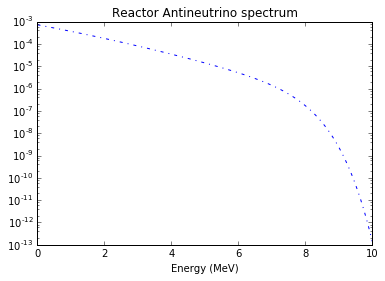

In [3]:
#Reactor Neutrino spectrum: source https://arxiv.org/pdf/0903.4821.pdf
K = 5.09 #(MeV*fission)**-1
a = -0.648
b = -0.0273
c = -1.41
Ev = np.linspace(0.001, 10, 10000)
p_Ev = K*np.exp(a*Ev + b*Ev**2 + c*(Ev/8)**10)
p_Ev /= sum(p_Ev)
fig = plt.figure()
plt.plot(Ev, p_Ev, '-.')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.title('Reactor Antineutrino spectrum')


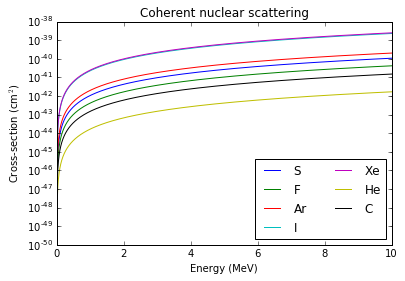

In [4]:
#Target properties. Sulphur: A=32, Z=16. Fluorine: A=19, Z=9.
A_S = 32
Z_S = 16
N_S = A_S - Z_S
xsn_S = (0.42e-44)*(N_S**2)*Ev**2
A_F = 19
Z_F = 9
N_F = A_F - Z_F
xsn_F = (0.42e-44)*(N_F**2)*Ev**2
A_Ar = 40
Z_Ar = 18
N_Ar = A_Ar - Z_Ar
xsn_Ar = (0.42e-44)*(N_Ar**2)*Ev**2
A_I = 53
Z_I = 127
N_I = A_I - Z_I
xsn_I = (0.42e-44)*(N_I**2)*Ev**2
A_Xe = 54
Z_Xe = 131
N_Xe = A_Xe - Z_Xe
xsn_Xe = (0.42e-44)*(N_Xe**2)*Ev**2
A_He = 4
Z_He = 2
N_He = A_He - Z_He
xsn_He = (0.42e-44)*(N_He**2)*Ev**2
A_C = 6
Z_C = 12
N_C = A_C - Z_C
xsn_C = (0.42e-44)*(N_C**2)*Ev**2

fig = plt.figure()
plt.plot(Ev, xsn_S, label='S')
plt.plot(Ev, xsn_F, label='F')
plt.plot(Ev, xsn_Ar, label='Ar')
plt.plot(Ev, xsn_I, label='I')
plt.plot(Ev, xsn_Xe, label='Xe')
plt.plot(Ev, xsn_He, label='He')
plt.plot(Ev, xsn_C, label='C')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross-section (cm$^{2}$)')
plt.title('Coherent nuclear scattering')
plt.legend(loc='lower right', ncol=2)

Sulphur/Fluorine Rate > 1.0 keV = 0.9395275774694488
Argon/Fluorine Rate > 1.0 keV = 0.8933208802449033
Iodine/Fluorine Rate > 1.0 keV = 2.6022007237970284
Xenon/Fluorine Rate > 1.0 keV = 2.493130898869477
Helium/Fluorine Rate > 1.0 keV = 0.12095845104538704
Carbon/Fluorine Rate > 1.0 keV = 0.940440737929957


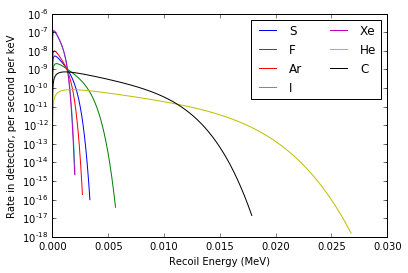

In [5]:
#Recoil kinematics and event rate
Theta = np.linspace(0, 2*np.pi, 1000)
MeV_per_amu = 931.5
#E_r = ((Theta**2)/(2*A*MeV_per_amu) + 1/Ev)**-1
#E_r = (((A*MeV_per_amu)**2 + 2*Ev*(1-np.cos(Theta)))/(2*Ev*(1-np.cos(Theta))))**-1
E_r_S_proper = np.empty((len(Ev), len(Theta)), dtype=np.float64)
for theEn in Ev:
    for theTheta in Theta:
        E_r_S_proper = (((theEn**2)*(1 - np.cos(theTheta)))/
                        (A_S*MeV_per_amu + theEn*(1-np.cos(theTheta))))

E_r_S = ((Ev**2)/((A_S*MeV_per_amu) + Ev))
E_r_F = ((Ev**2)/((A_F*MeV_per_amu) + Ev))
E_r_Ar = ((Ev**2)/((A_Ar*MeV_per_amu) + Ev))
E_r_I = ((Ev**2)/((A_I*MeV_per_amu) + Ev))
E_r_Xe = ((Ev**2)/((A_Xe*MeV_per_amu) + Ev))
E_r_He = ((Ev**2)/((A_He*MeV_per_amu) + Ev))
E_r_C = ((Ev**2)/((A_C*MeV_per_amu) + Ev))

MolarMass = 88 #g/mol
TargetMass = 3.5*1e3 #g
#Reaction rate(E) = P(E)*xsn*flux on detector*Atoms in detector
plt.plot(E_r_S, xsn_S*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='S')
plt.plot(E_r_F, xsn_F*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='F')
plt.plot(E_r_Ar, xsn_Ar*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='Ar')
plt.plot(E_r_I, xsn_I*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='I')
plt.plot(E_r_Xe, xsn_Xe*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='Xe')
plt.plot(E_r_He, xsn_He*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='He')
plt.plot(E_r_C, xsn_C*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='C')
plt.yscale('log')
plt.legend(loc='best', ncol=2)
plt.xlabel('Recoil Energy (MeV)')
plt.ylabel('Rate in detector, per second per keV')

#Threshold
EnThr = 0.001
print('Sulphur/Fluorine Rate > {} keV = {}'.format(EnThr*1e3,
    sum((xsn_S*p_Ev)[E_r_S>EnThr])/sum((xsn_F*p_Ev)[E_r_F>EnThr])))
print('Argon/Fluorine Rate > {} keV = {}'.format(EnThr*1e3,
    sum((xsn_Ar*p_Ev)[E_r_Ar>EnThr])/sum((xsn_F*p_Ev)[E_r_F>EnThr])))
print('Iodine/Fluorine Rate > {} keV = {}'.format(EnThr*1e3,
    sum((xsn_I*p_Ev)[E_r_I>EnThr])/sum((xsn_F*p_Ev)[E_r_F>EnThr])))
print('Xenon/Fluorine Rate > {} keV = {}'.format(EnThr*1e3,
    sum((xsn_Xe*p_Ev)[E_r_Xe>EnThr])/sum((xsn_F*p_Ev)[E_r_F>EnThr])))
print('Helium/Fluorine Rate > {} keV = {}'.format(EnThr*1e3,
    sum((xsn_He*p_Ev)[E_r_He>EnThr])/sum((xsn_F*p_Ev)[E_r_F>EnThr])))
print('Carbon/Fluorine Rate > {} keV = {}'.format(EnThr*1e3,
    sum((xsn_C*p_Ev)[E_r_C>EnThr])/sum((xsn_F*p_Ev)[E_r_F>EnThr])))

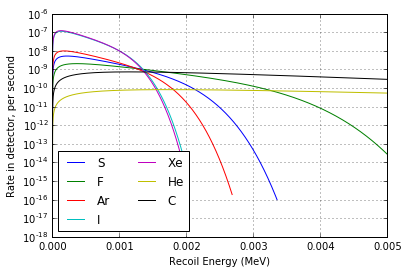

In [43]:
#Reaction rate(E) = P(E)*xsn*flux on detector*Atoms in detector
plt.plot(E_r_S, xsn_S*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='S')
plt.plot(E_r_F, xsn_F*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='F')
plt.plot(E_r_Ar, xsn_Ar*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='Ar')
plt.plot(E_r_I, xsn_I*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='I')
plt.plot(E_r_Xe, xsn_Xe*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='Xe')
plt.plot(E_r_He, xsn_He*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='He')
plt.plot(E_r_C, xsn_C*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)), label='C')
plt.yscale('log')
plt.legend(loc='best', ncol=2)
plt.xlabel('Recoil Energy (MeV)')
plt.ylabel('Rate in detector, per second')
plt.xlim(0,0.005)
plt.grid()

In [58]:
MolarMass = 146 #g/mol
TargetMass = 6.17*1e3 #g/m3
Atoms_per_Molecule = 6
F_rate = xsn_F*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)*Atoms_per_Molecule)
Binw = E_r_F[1]-E_r_F[0]
print(sum(F_rate[E_r_F>0.0001])*3600*24)
print(sum(E_r_F>0.001))
print(max(F_rate[E_r_F>0.001]))

4.01496148715
5793
8.89569603434e-09


In [59]:
MolarMass = 146 #g/mol
TargetMass = 6.17*1e3 #g/m3
Atoms_per_Molecule = 1
S_rate = xsn_S*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)*Atoms_per_Molecule)
Binw = E_r_S[1]-E_r_S[0]
print(sum(S_rate[E_r_S>0.0001])*3600*24)
print(sum(E_r_S>0.001))
print(max(S_rate[E_r_S>0.001]))

1.56530006708
4540
1.98123942408e-09


So a 1 Bar, 1 m$^{3}$ detector 10 metres from OPAL would see 1.145 F-recoils/day above 1 keV and 0.179 S recoils/day above 1 keV; giving an overall rate of 1.32 recoils/day above threshold. Moving the detector to 5 m would give ~4x the rate (5.3 recoils/day) and measuring 10m from a 3 GW reactor would give 199 recoils/day.

In [28]:
Ar_rate = xsn_Ar*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass))
Binw = E_r_Ar[1]-E_r_Ar[0]
sum(F_rate[E_r_Ar>0.001]*Binw*1000)

3.0901562345799288e-14

In [23]:
Binw

1.6950586798238856e-10

In [21]:
1e-9*3600*24

8.640000000000001e-05

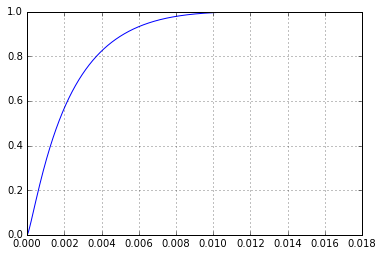

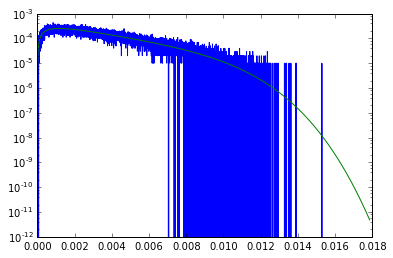

In [6]:
#Distribute to lower energy bins:
Nsamp = 100000
theCDF = np.cumsum(xsn_C*p_Ev*OPAL_vRate*N_Av/1000)/np.sum(xsn_C*p_Ev*OPAL_vRate*N_Av/1000)
fig = plt.figure()
plt.plot(E_r_C, theCDF)
plt.grid()

therecoils = np.empty(Nsamp, dtype=np.float64)
theweights = np.empty(Nsamp, dtype=np.float64)
for i in range(Nsamp):
    randidx = np.argmin(np.abs(theCDF - np.random.uniform()))
    Er_max = E_r_C[randidx]
    therecoils[i] = Er_max
    #theweights[i] = p_Ev[randidx]*xsn_C[randidx]*OPAL_vRate*N_Av/1000

fig = plt.figure()
ret = plt.hist(therecoils, bins=E_r_C, range = (0, max(E_r_C)), weights=[(1/Nsamp)]*Nsamp, histtype='step')
plt.plot(E_r_C, (xsn_C*p_Ev*OPAL_vRate*N_Av/1000)/sum(xsn_C*p_Ev*OPAL_vRate*N_Av/1000))
plt.yscale('log')
#fig = plt.figure()
#plt.plot((theweights/Nsamp)/xsn_C*p_Ev*OPAL_vRate*N_Av/1000)

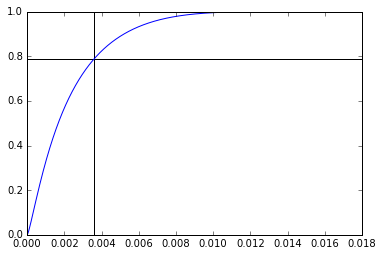

In [7]:
plt.plot(E_r_C, theCDF)
randnum=np.random.uniform()
plt.hlines(randnum, 0, 0.018)
plt.vlines(E_r_C[np.argmin(np.abs(theCDF - randnum))], 0, 1)

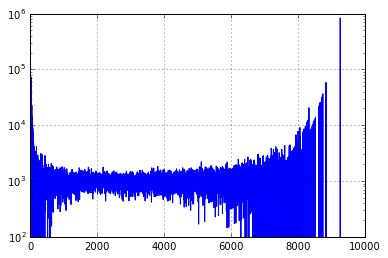

In [8]:
plt.plot(ret[0]/(xsn_C*p_Ev*OPAL_vRate*N_Av/1000)[1:])
plt.yscale('log')
plt.grid()

In [88]:
sum((xsn_F*p_Ev*det_vRate*(N_Av*(TargetMass/MolarMass)))[E_r_F>(EnThr/10)])*3600*24

0.62977178181792814

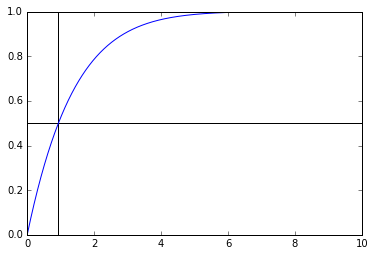

In [9]:
fig = plt.figure()
plt.plot(Ev, np.cumsum(p_Ev))
plt.hlines(0.5, 0, 10)
plt.vlines(Ev[np.argmin(np.abs(np.cumsum(p_Ev)-0.5))], 0, 1)

In [10]:
choices = np.random.choice(3, 10000, p=[0.1, 0.5, 0.4])
print("{} 0's, {} 1's, and {} 2's".format(sum(choices==0), sum(choices==1), sum(choices==2)))

991 0's, 4961 1's, and 4048 2's


In [11]:
np.random.choice(3, p=[0.1, 0.5, 0.4])

2

'\n#SampleEns = [Ev[theidx] for theidx in i_En]\n#i_nuc = np.random.choice(len(Target[0]), Nevts, Target[1])\n#SampleN = [Target[0][theidx] for theidx in i_nuc]\n#SampleMasses = [Target[2][theidx] for theidx in i_nuc]\n#Work out the recoil energy:\nRecoilEn = np.empty((len(Target[0]), Nevts), dtype=np.float64)\np_Recoil = np.empty((len(Target[0]), Nevts), dtype=np.float64)\nfor i in range(len(Target[0])):\n    RecoilEn[i] = [np.random.uniform(0,((Ev[Enidx]**2)/((Target[2][i]*MeV_per_amu) + Ev[Enidx])))\n                for Enidx in i_En]\n    p_Recoil[i] = [((0.42e-44)*(Target[0][i]**2)*Ev[Enidx]**2) * p_Ev[Enidx]*OPAL_vRate*N_Av/1000 \n                for Enidx in i_En]\n    p_Recoil[i] *= Target[1][i]\n    \n#p_Recoil = [((0.42e-44)*(Target[0][Nuclidx]**2)*Ev[Enidx]**2) * p_Ev[Enidx]*OPAL_vRate*N_Av/1000 \n#            for Enidx, Nuclidx in zip(i_En, i_nuc)]\n'

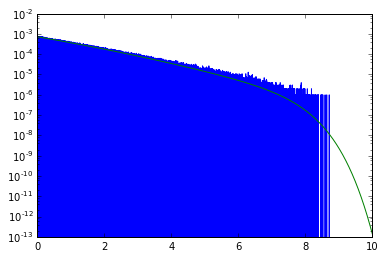

In [12]:
#Better calculation: toy MC.
#Target info array: 1st dimension = # neutrons in target nucleus, 2nd dimension  = Mole fraction, 3rd dimension = A.
#Baseline design: 70% CF4 (700 Torr), 30% CS2 (300 Torr)
StdTarget = np.array([[N_C, N_F, N_S], [1/4.4, 2.8/4.4, 0.6/4.4], [A_C, A_F, A_S]])
#Alternate design: 100% SF6 (500 Torr)
AltTarget = np.array([[N_S, N_F], [1/7, 6/7], [A_S, A_F]])

Nevts = 1000000
Target= StdTarget

Results = np.empty(Nevts, dtype=np.float64)

#Do MC
i_En = [np.argmin(np.abs(np.cumsum(p_Ev) - np.random.uniform())) for i in range(Nevts)]
#Reproduce the neutrino spectrum 
sampledpEv = [Ev[theidx] for theidx in i_En]
fig = plt.figure()
plt.hist(sampledpEv, bins=len(p_Ev), histtype='step', weights=[1/Nevts]*Nevts)
plt.yscale('log')
plt.plot(Ev, p_Ev)
MaxEns = np.empty([len(Target[0]), Nevts], dtype=np.float64)
Ens = np.empty([len(Target[0]), Nevts], dtype=np.float64)
Wgts = np.empty([len(Target[0]), Nevts], dtype=np.float64)
for i in range(len(Target[0])):
    for j, theEn in enumerate(sampledpEv):
        #work out the xsn.
        thexsn = (0.42e-44)*(Target[0][i]**2)*theEn**2
        E_r_max = ((theEn**2)/((Target[2][i]*MeV_per_amu) + theEn))
        theE_r = np.random.uniform(0, E_r_max)
        MaxEns[i][j] = E_r_max
        Ens[i][j] = theE_r
        Wgts[i][j] = thexsn
    #break

#fig = plt.figure()
#plt.hist(Ens, bins=E_r_C, weights=Wgts)
#plt.plot(E_r_C, xsn_C*p_Ev*OPAL_vRate*N_Av/1000, label='C')

'''
#SampleEns = [Ev[theidx] for theidx in i_En]
#i_nuc = np.random.choice(len(Target[0]), Nevts, Target[1])
#SampleN = [Target[0][theidx] for theidx in i_nuc]
#SampleMasses = [Target[2][theidx] for theidx in i_nuc]
#Work out the recoil energy:
RecoilEn = np.empty((len(Target[0]), Nevts), dtype=np.float64)
p_Recoil = np.empty((len(Target[0]), Nevts), dtype=np.float64)
for i in range(len(Target[0])):
    RecoilEn[i] = [np.random.uniform(0,((Ev[Enidx]**2)/((Target[2][i]*MeV_per_amu) + Ev[Enidx])))
                for Enidx in i_En]
    p_Recoil[i] = [((0.42e-44)*(Target[0][i]**2)*Ev[Enidx]**2) * p_Ev[Enidx]*OPAL_vRate*N_Av/1000 
                for Enidx in i_En]
    p_Recoil[i] *= Target[1][i]
    
#p_Recoil = [((0.42e-44)*(Target[0][Nuclidx]**2)*Ev[Enidx]**2) * p_Ev[Enidx]*OPAL_vRate*N_Av/1000 
#            for Enidx, Nuclidx in zip(i_En, i_nuc)]
'''

In [13]:
binw = (ret[1][1] - ret[1][0])
binc = ret[1][:-1] + binw/2
sum(ret[0][binc>0.001]*3600*24*binw*1000)

0.031077552242915502

In [14]:
binw

5.3676842861697804e-10

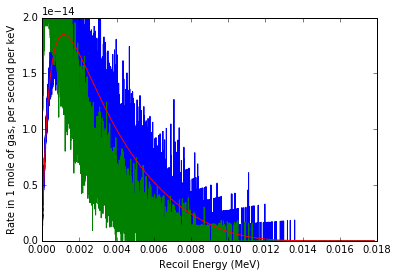

In [15]:
fig = plt.figure()
plt.hist(MaxEns[0], bins=E_r_C, weights=(Wgts[0]*det_vRate*N_Av/1000)/Nevts, histtype='step')
ret = plt.hist(Ens[0], bins=E_r_C, weights=(Wgts[0]*det_vRate*N_Av/1000)/Nevts, histtype='step')
plt.plot(E_r_C, xsn_C*p_Ev*det_vRate*N_Av/1000, label='C')
plt.yscale('linear')
plt.xlabel('Recoil Energy (MeV)')
plt.ylabel('Rate in 1 mole of gas, per second per keV')


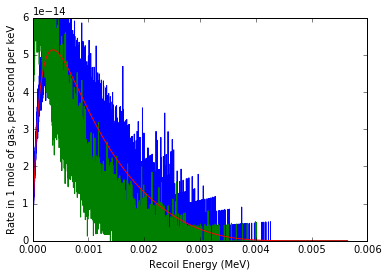

In [91]:
fig = plt.figure()
plt.hist(MaxEns[1], bins=E_r_F, weights=(Wgts[1]*det_vRate*N_Av/1000)/Nevts, histtype='step')
ret = plt.hist(Ens[1], bins=E_r_F, weights=(Wgts[1]*det_vRate*N_Av/1000)/Nevts, histtype='step')
plt.plot(E_r_F, xsn_F*p_Ev*det_vRate*N_Av/1000, label='F')
plt.yscale('linear')
plt.xlabel('Recoil Energy (MeV)')
plt.ylabel('Rate in 1 mole of gas, per second per keV')


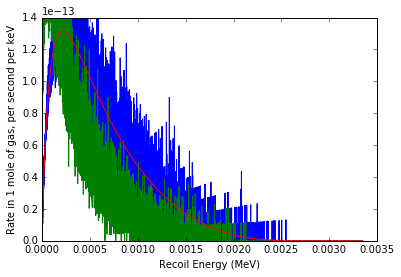

In [16]:
fig = plt.figure()
plt.hist(MaxEns[2], bins=E_r_S, weights=(Wgts[2]*det_vRate*N_Av/1000)/Nevts, histtype='step')
ret = plt.hist(Ens[2], bins=E_r_S, weights=(Wgts[2]*det_vRate*N_Av/1000)/Nevts, histtype='step')
plt.plot(E_r_S, xsn_S*p_Ev*det_vRate*N_Av/1000, label='S')
plt.yscale('linear')
plt.xlabel('Recoil Energy (MeV)')
plt.ylabel('Rate in 1 mole of gas, per second per keV')


In [17]:
2e-14*3*10*3600*24

5.184e-08